## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import missingno as msno
%matplotlib inline 


import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
cd /Users/angeldurrani/Documents/GitHub/datacapstone/dcapstone/data/raw

/Users/angeldurrani/Documents/GitHub/datacapstone/dcapstone/data/raw


In [3]:
data = pd.read_csv("Demographic_Data_Orig.csv")

## Looking at the Data

In [4]:
data.head(5)

,index,full.name,ip.address,region,in.store,age,items,amount
0,0,Carter Stokes,NaN,2,0,37,4,281.03
1,1,Jacob Jerde,NaN,2,0,35,2,219.51
2,2,Tressa Ratke,192.90.208.202,4,1,45,3,1525.70
3,3,Rudolf Abshire,251.55.128.164,3,1,46,3,715.25
4,4,Theresa Davis,182.19.192.186,1,1,33,4,1937.50


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data

,index,full.name,ip.address,region,in.store,age,items,amount
0,0,Carter Stokes,NaN,2,0,37,4,281.03
1,1,Jacob Jerde,NaN,2,0,35,2,219.51
2,2,Tressa Ratke,192.90.208.202,4,1,45,3,1525.70
3,3,Rudolf Abshire,251.55.128.164,3,1,46,3,715.25
4,4,Theresa Davis,182.19.192.186,1,1,33,4,1937.50
...,...,...,...,...,...,...,...,...
79995,79995,Hien Kertzmann,17.5.218.127,1,1,71,3,558.82
79996,79996,Celsa Nikolaus,NaN,3,0,59,7,1932.00
79997,79997,Noel Jewess,NaN,2,0,54,1,414.16
79998,79998,Mallie Schaden,142.236.73.247,1,1,49,4,335.32


In [7]:
dataNull = data.isnull()
dataNull.sum()

index             0
full.name         0
ip.address    40000
region            0
in.store          0
age               0
items             0
amount            0
dtype: int64

In [8]:
dataNull.mean()*100

index          0.0
full.name      0.0
ip.address    50.0
region         0.0
in.store       0.0
age            0.0
items          0.0
amount         0.0
dtype: float64

<AxesSubplot:>

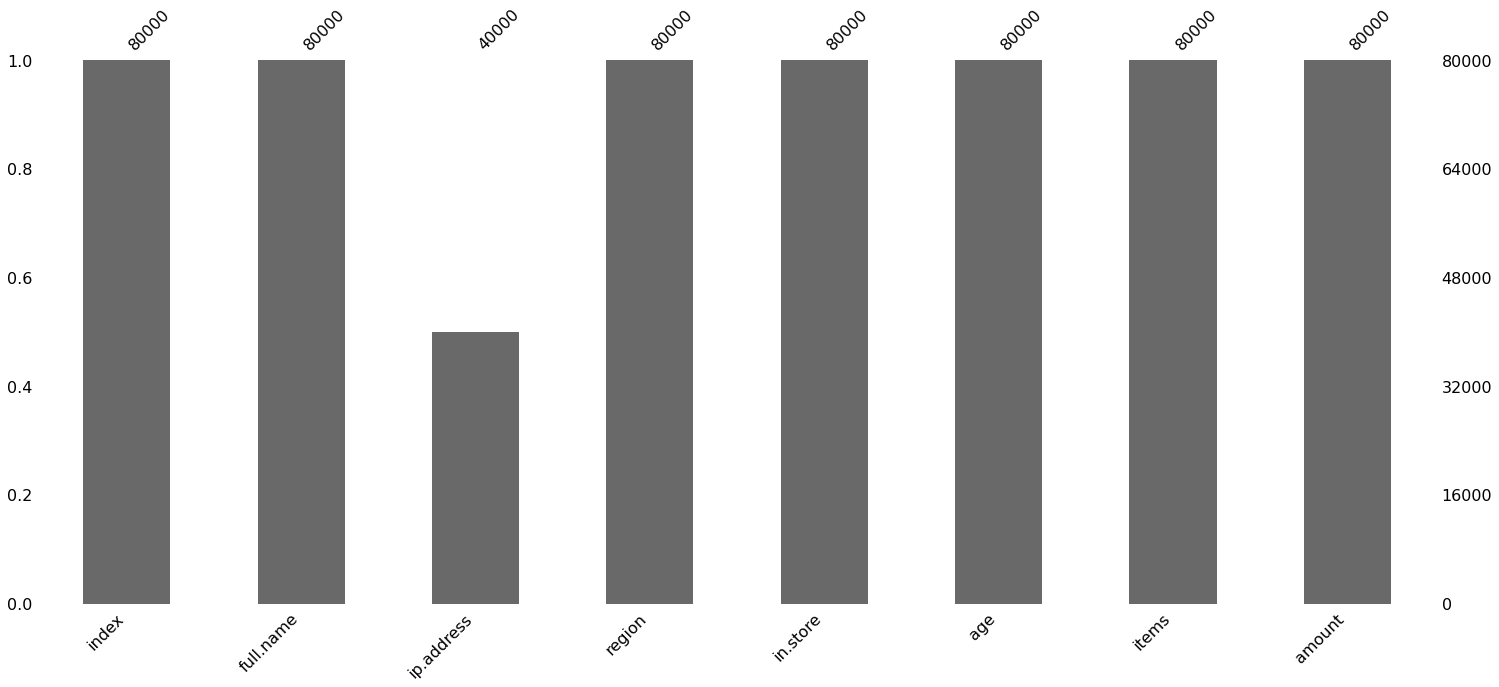

In [9]:
msno.bar(data)

## Cleaning Data 

In [10]:
data = data.drop(['ip.address'], axis=1)

In [11]:
data = data.drop(['full.name'], axis=1)

In [12]:
data

,index,region,in.store,age,items,amount
0,0,2,0,37,4,281.03
1,1,2,0,35,2,219.51
2,2,4,1,45,3,1525.70
3,3,3,1,46,3,715.25
4,4,1,1,33,4,1937.50
...,...,...,...,...,...,...
79995,79995,1,1,71,3,558.82
79996,79996,3,0,59,7,1932.00
79997,79997,2,0,54,1,414.16
79998,79998,1,1,49,4,335.32


In [13]:
n = 79500
data = data.iloc[:-n] 

In [14]:
print(data)

     index  region  in.store  age  items   amount
0        0       2         0   37      4   281.03
1        1       2         0   35      2   219.51
2        2       4         1   45      3  1525.70
3        3       3         1   46      3   715.25
4        4       1         1   33      4  1937.50
..     ...     ...       ...  ...    ...      ...
495    495       4         0   41      8  2153.40
496    496       1         1   39      7   178.99
497    497       3         0   44      4   535.29
498    498       1         1   35      6   645.39
499    499       4         1   41      6   391.01

[500 rows x 6 columns]


## Linear Regression Model

In [15]:
x = data["age"]
y = data ["amount"]
x = x.values.reshape(-1,1)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

r_sq = regressor.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_) 

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("r-squared: ",r2)
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

coefficient of determination: 0.04516276861134216
intercept: 1224.6283886194374
slope: [-9.75972361]
r-squared:  0.002454448440965651
MAE:  628.8900553125193
MSE:  666097.0014057398
RMSE:  816.1476590701831


In [16]:

x1 = data["region"]
y1 = data ["amount"]
x1 = x1.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size= 0.2, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x1_train,y1_train)

y1_pred = regressor.predict(x1_test)

r_sq1 = regressor.score(x1, y1)
print('coefficient of determination:', r_sq1)
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_) 


r21 = r2_score(y1_test,y1_pred)
print("r-squared: ",r21)
print("MAE: ",mean_absolute_error(y1_test,y1_pred))
print("MSE: ",mean_squared_error(y1_test,y1_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

coefficient of determination: 0.13988017107937545
intercept: 188.47851801917977
slope: [219.61990355]
r-squared:  0.1441277232987057
MAE:  595.7296684450475
MSE:  571496.6661984035
RMSE:  755.9739851333533


## Logistic Regression Model

In [44]:
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

x10 = data["age"]
y10 = data ["amount"]
x10 = x10.values.reshape(-1,1)

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size= 0.2, random_state=0)


logreg = LogisticRegression(random_state=16)

logreg.fit(x10_train, y10_train)

y10_pred = logreg.predict(x10_test)
y10_pred

predictions = logisticRegr.predict(x10_test)

score = logisticRegr.score(x10_test, y10_test)
print(score)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


ValueError: Unknown label type: 'continuous'

In [ ]:
x9 = data["region"]
y9 = data ["amount"]
x9 = x10.values.reshape(-1,1)

x9_train, x9_test, y9_train, y9_test = train_test_split(x9, y9, test_size= 0.2, random_state=0)


logreg = LogisticRegression(random_state=16)

logreg.fit(x9_train, y9_train)

y9_pred = logreg.predict(x9_test)
y9_pred

predictions = logisticRegr.predict(x9_test)

score = logisticRegr.score(x9_test, y9_test)
print(score)
cm = metrics.confusion_matrix(y9_test, predictions)
print(cm)


## Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

X3= data["age"]
y3=data["amount"]
X3 = X3.values.reshape(-1,1)
y3 = y3.values.reshape(-1,1)


X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=44) 

rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X3_train, y3_train)

predictions = rf_model.predict(X3_test)
predictions
predictions1 = rf_model.predict(y3_test)
predictions1

/var/folders/t3/pfntgz6x0ys77159fwyhpvsm0000gn/T/ipykernel_73666/1621249396.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X3_train, y3_train)


ValueError: Unknown label type: 'continuous'

In [ ]:
X4= data["region"]
y4=data["amount"]
X4 = X4.values.reshape(-1,1)
y4 = y4.values.reshape(-1,1)


X4_train, X4_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=44) 

rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X3_train, y3_train)

predictions = rf_model.predict(X3_test)
predictions
predictions1 = rf_model.predict(y3_test)
predictions1

## Gradient Boosted Tree Regressor Model

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
X5= data["age"]
y5=data["amount"]
X5 = X5.values.reshape(-1,1)


X5, y5 = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X5, y5, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [ ]:
X6= data["region"]
y6=data["amount"]
X6 = X6.values.reshape(-1,1)


X6, y6 = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X6, y6, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


## Gradient Boosted Tree Classification Model

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
X8= data["age"]
y8=data["amount"]
X8 = X8.values.reshape(-1,1)

X8, y8 = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X8, y8, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [ ]:
X7= data["region"]
y7=data["amount"]
X7 = X7.values.reshape(-1,1)

X7, y7 = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X7, y7, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

